In [1]:
import numpy as np

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
rcParams['mathtext.fontset'] = 'stix'
from skimage.feature import peak_local_max
from skimage import filters
# color map 
cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.34,  168 / 256, 168 /256],
                   [0.67,  243 / 256, 243 / 256],
                   [1.0, 1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.34, 40 / 256, 40 / 256],
                   [0.67, 194 / 256, 194/ 256],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.34,  15 / 256, 15 / 256],
                   [0.67,  93 / 256, 93 /256],
                   [1.0, 1.0, 1.0]]}
gwyddion = LinearSegmentedColormap('gwyddion', segmentdata = cdict, N = 256)

import inspect
import os
import string
import struct
import math
import re
import Nanonis as nano

import ipywidgets as widgets

In [12]:
def sxm2figuer(fname):
    f = nano.read_file(fname)
    
    fig, axes = plt.subplots(2, 2, figsize = (6, 6))
    for i in range(len(f.data)):
        for j in range(len(f.data[i])):
            axes[i][j].imshow(f.data[i][j], cmap = gwyddion)
            axes[i][j].axis('off')
    fig.tight_layout()

In [13]:
def dat2figure(fname):
    f = nano.read_file(fname)
    data = f.data
    fig, axis = plt.subplots(1, 2, figsize = (10, 5), sharex = True)
    for i in range(len(data)):
        axis[0].plot(data[i][0], (data[i][4] + data[i][1]) / 2 * 1e12, '.', color = 'black')
        axis[1].plot(data[i][0], (data[i][2] + data[i][5]) / 2 * 1e12, '.', color = 'black')
    axis[0].axhline(y = 0, ls = '--',color = 'black')
    axis[1].axhline(y = 0, ls = '--',color = 'black')
    axis[0].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
    axis[1].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
    axis[0].set_ylabel(r'$Current\ \mathrm{[pA]}$', fontsize = 14)
    axis[1].set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
    fig.tight_layout();

In [51]:
folder_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-02/'
widgets.interact(dat2figure, fname = nano.dat_path_list(folder_path));

interactive(children=(Dropdown(description='fname', options=('/Users/hunfen/OneDrive/General Files/ゼミー/202011…

In [52]:
folder_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-02/'
widgets.interact(sxm2figuer, fname = nano.sxm_path_list(folder_path));

interactive(children=(Dropdown(description='fname', options=('/Users/hunfen/OneDrive/General Files/ゼミー/202011…

In [ ]:
f = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-10-31/Topography006.sxm')
raw_image = f.data[0][0]
# Normalization
raw_image_0ffset = raw_image - raw_image.min()
normalized_image = raw_image_0ffset/ raw_image_0ffset.max()

# Gaussian filter
# gaus_filtered_img = filters.gaussian(normalized_image, sigma = 0.6)

# 2D DFFT
fft2_raw = np.fft.fftshift(np.fft.fft2(normalized_image))
# fft2_gaus_filtered_img = np.fft.fftshift(np.fft.fft2(gaus_filtered_img))

# Plot the normalized image and FFT image 
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(normalized_image, cmap = gwyddion)
axes[0].axis('off')

axes[1].imshow(np.log10(np.abs(fft2_raw))[64:192, 64:192], cmap = 'gist_yarg')
axes[1].axis('off')
#axes[1][0].imshow(gaus_filtered_img, cmap = 'gray')
#axes[1][0].axis('off')
#axes[1][1].imshow(np.log10(np.abs(fft2_gaus_filtered_img)), cmap = 'gray')
#axes[1][1].axis('off')

# Find peaks in FFT image
# peaks_coordinates = peak_local_max(np.log10(np.abs(fft2_raw)), min_distance = 10)
#peaks_coordinates_gaus = peak_local_max(np.log10(np.abs(fft2_gaus_filtered_img)), min_distance = 20)
#atoms_coordinates = peak_local_max(nomalized_image, min_distance = 1)

# Plot atoms 
#axes[0].plot(atoms_coordinates[:, 1], atoms_coordinates[:, 0], 'r.')
#axes[0].plot([123, 122], [112, 113], ls = '-', color = 'black')

# Plot peaks
# axes[1].plot(peaks_coordinates[:, 1], peaks_coordinates[:, 0], 'r.')
#axes[0][1].plot(peaks_coordinates_gaus[:, 1], peaks_coordinates_gaus[:, 0], 'y.')
#axes[1][1].plot(peaks_coordinates_gaus[:, 1], peaks_coordinates_gaus[:, 0], 'b.')
#axes[1].plot([64, 87], [64, 76], ls = '-', lw = 1.5, color = 'black')
#axes[1].plot([64, 52], [64, 87], ls = '-', lw = 1.5, color = 'black')

#L = np.zeros(len(peaks_coordinates))
# Calculate length between peaks and center
#for i in range(len(peaks_coordinates)):
    #L[i] = math.sqrt(((peaks_coordinates[i, 1] - 128) / size) ** 2 + ((peaks_coordinates[i, 0] - 128) / size) ** 2)


# 寻找最小值
#axes[1].plot(peaks_coordinates[np.argpartition(L, smallest_7)[1: 3], 1], peaks_coordinates[np.argpartition(L, smallest_7)[1: 3], 0], ls = '-', lw = 2, color = 'black')
'''
for i in range(smallest_7):
    axes[1].plot(peaks_coordinates[np.argpartition(L, smallest_7)[i], 1], peaks_coordinates[np.argpartition(L, smallest_7)[i], 0])
    #print(L[np.argpartition(L, smallest_7)[i]])
'''

fig.tight_layout();

In [ ]:
a = np.array([-1, 3])
b = np.array([2, 0])

theta = math.atan(3/4)
rotation = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]])
a_ = np.dot(rotation, a)
b_ = np.dot(rotation, b)

In [ ]:
f_500 = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-02/Topography001.sxm')
f_40 = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-02/Topography002.sxm')
f_10 = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-02/Topography008.sxm')
extent_500 = nano.topo_extent(f_500.header)
extent_40 = nano.topo_extent(f_40.header)
extent_10 = nano.topo_extent(f_10.header)

# plot
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

axis[0].axis('off')
axis[0].imshow(f_500.data[0][0], extent = extent_500,cmap = gwyddion)
# Plot rectangle
axis[0].add_patch(Rectangle((extent_40[0], extent_40[2]), f_40.header['SCAN_FILED']['X_RANGE'], f_40.header['SCAN_FILED']['Y_RANGE'], fill = False, ls = '--', color = 'black'))

axis[1].axis('off')
axis[1].imshow(f_40.data[0][0], extent = extent_40,cmap = gwyddion)
axis[1].add_patch(Rectangle((extent_10[0], extent_10[2]), f_10.header['SCAN_FILED']['X_RANGE'], f_10.header['SCAN_FILED']['Y_RANGE'], fill = False, ls = '--', color = 'white'))

axis[2].axis('off')
axis[2].imshow(f_10.data[0][0], extent = extent_10, cmap = gwyddion)

fig.tight_layout();

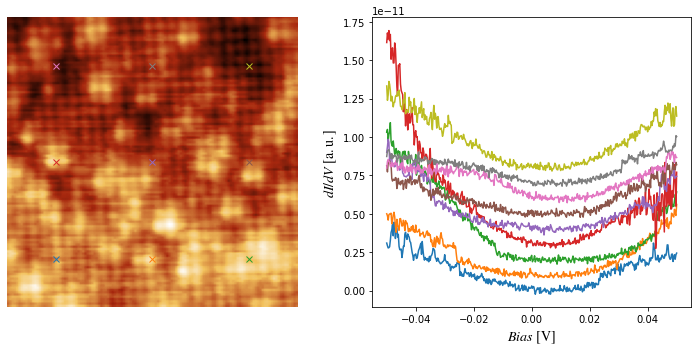

In [44]:
f_topo = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-06/Topography008.sxm')
f_spec = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-06/Grid Spectroscopy009.3ds')
topo_extent = nano.topo_extent(f_topo.header)

fig, axis = plt.subplots(1, 2, figsize = (10, 5))

axis[0].axis('off')
axis[0].imshow(f_topo.data[0][0], extent = topo_extent,cmap = gwyddion)

for i in range(len(f_spec.Parameters)):
    axis[0].plot(f_spec.Parameters[i][2], f_spec.Parameters[i][3], 'x')
    axis[1].plot(np.linspace(f_spec.Parameters[i][0], f_spec.Parameters[i][1], f_spec.header['Points']), f_spec.data[i][4] + 1e-12 * i)


axis[1].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis[1].set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();

In [45]:
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/topo_specs_FeSe_1UC_10_50mV100pA.jpg', dpi = 600)

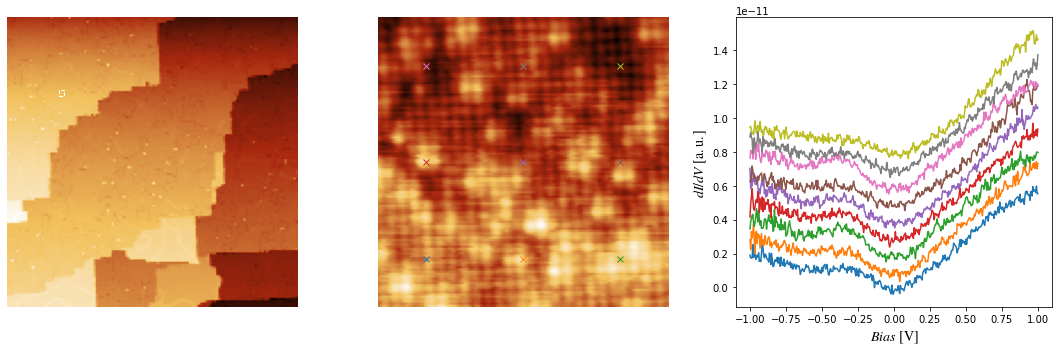

In [46]:
f_L = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-06/Topography001.sxm')
f_S = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-06/Topography008.sxm')
spec = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/2020-11-06/Grid Spectroscopy001.3ds')
extent_L = nano.topo_extent(f_L.header)
extent_S = nano.topo_extent(f_S.header)

# plot
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

axis[0].axis('off')
axis[0].imshow(f_L.data[0][0], extent = extent_L,cmap = gwyddion)
axis[0].add_patch(Rectangle((extent_S[0], extent_S[2]), f_S.header['SCAN_FILED']['X_RANGE'], f_S.header['SCAN_FILED']['Y_RANGE'], fill = False, ls = '--', color = 'white'))

axis[1].axis('off')
axis[1].imshow(f_S.data[0][0], extent = extent_S, cmap = gwyddion)

# specs
for i in range(len(spec.Parameters)):
    axis[1].plot(spec.Parameters[i][2], spec.Parameters[i][3], 'x')
    axis[2].plot(list(np.linspace(spec.Parameters[i][0], spec.Parameters[i][1], spec.header['Points'])), spec.data[i][4] + (i * 1e-12))
# axis[2].set_xlim(-0.02,0.03)
# axis[2].set_ylim(-0.1e-11, 1e-11)
# axis[2].axvline(x = -0.4, ls = '--', color = 'black')
axis[2].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis[2].set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();

In [21]:
fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20201110/topo_specs_FeSe_1UC_200_10_50mV100pA.jpg', dpi = 600)

In [47]:
f_L.header

{'REC_DATE': '06.11.2020',
 'REC_TIME': '11:04:17',
 'ACQ_TIME': 1282.2,
 'SCAN_FILE': 'C:\\Users\\Touru Hirahara\\Desktop\\data\\2020\\2020-11-06\\Topography001.sxm',
 'SCAN_DIR': 'down',
 'BIAS': 1.5,
 'COMMENT': 'Tilt corrected by Topography019.sxm',
 'Scan>series name': 'Topography',
 'Scan>pixels/line': 128.0,
 'Scan>lines': 128.0,
 'Scan>speed forw. (m/s)': 1.00032e-07,
 'Scan>speed backw. (m/s)': 1.00032e-07,
 'SCAN_FILED': {'X_OFFSET': -3.89766e-07,
  'Y_OFFSET': 3.77809e-07,
  'X_RANGE': 5e-07,
  'Y_RANGE': 5e-07,
  'ANGLE': 0.0},
 'CONTROLLER_INFO': {'Name': 'log Current',
  'on': '1',
  'Setpoint': '2.000E-11 A',
  'P-gain': '1.500E-12 m',
  'I-gain': '1.875E-7 m/s',
  'T-const': '8.000E-6 s'},
 'CHANNEL_INFO': {'14': {'Name': 'Z',
   'Unit': 'm',
   'Direction': 'both',
   'Calibration': '1.291E-8',
   'Offset': '0.000E+0'},
  '0': {'Name': 'Current',
   'Unit': 'A',
   'Direction': 'both',
   'Calibration': '1.000E-10',
   'Offset': '0.000E+0'}}}

In [ ]:
spec.header['Channels']